<a href="https://colab.research.google.com/github/siara-13-04/phase-2/blob/main/subin_phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load datasets
ratings = pd.read_csv('ratings.csv')      # userId, movieId, rating, timestamp
movies = pd.read_csv('movies.csv')        # movieId, title, genres

# Merge on movieId
df = pd.merge(ratings, movies, on='movieId')

# Preview
print(df.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [2]:
# Drop missing values if any
df.dropna(inplace=True)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Extract year from timestamp
df['year'] = df['timestamp'].dt.year

# Preview after cleaning
print(df[['userId', 'title', 'rating', 'timestamp', 'year']].head())


   userId                        title  rating           timestamp  year
0       1             Toy Story (1995)     4.0 2000-07-30 18:45:03  2000
1       1      Grumpier Old Men (1995)     4.0 2000-07-30 18:20:47  2000
2       1                  Heat (1995)     4.0 2000-07-30 18:37:04  2000
3       1  Seven (a.k.a. Se7en) (1995)     5.0 2000-07-30 19:03:35  2000
4       1   Usual Suspects, The (1995)     5.0 2000-07-30 18:48:51  2000


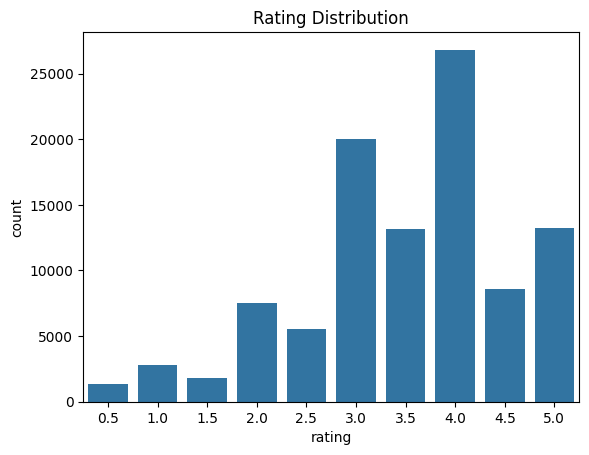

Top Genres:
 Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
dtype: int64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot rating distribution
sns.countplot(x='rating', data=df)
plt.title("Rating Distribution")
plt.show()

# Genre frequency
genre_counts = df['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
print("Top Genres:\n", genre_counts)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Build TF-IDF matrix on movie titles
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['title'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


TF-IDF Matrix Shape: (100836, 9037)


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_content(movie_title, top_n=5):
    idx = df[df['title'] == movie_title].index[0]
    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    similar_indices = cosine_sim.argsort()[-top_n-1:-1][::-1]
    return df.iloc[similar_indices][['title', 'genres']]

# Example usage
print("Recommendations for 'Toy Story (1995)':")
print(recommend_content('Toy Story (1995)'))

Recommendations for 'Toy Story (1995)':
                  title                                       genres
39060  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
27260  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
58965  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
39174  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
39229  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy


In [6]:
from collections import defaultdict
import pandas as pd

# ... (previous code for data loading, cleaning, TF-IDF, etc.) ...

def precision_at_k(predictions, k=5):
    # This is just a placeholder for the actual precision_at_k calculation
    # Replace with your actual implementation
    return 0  # Replace with the calculated precision@k value

# Assuming 'df' contains your data and you have a 'recommend_content' function
# Create a list of predictions based on recommendations for each user
# This part is a placeholder, replace with your actual prediction logic
predictions = []
# Define k here before the loop
k = 5
for userId in df['userId'].unique():
    # Get recommendations for the user using content-based filtering
    recommended_movies = recommend_content(df[df['userId'] == userId]['title'].iloc[0], top_n=k)  # Use the first movie watched by the user as input

    # Add recommendations to predictions list
    for movie_title in recommended_movies['title']:
        # Get the actual rating of the movie by the user (if available)
        actual_rating = df[(df['userId'] == userId) & (df['title'] == movie_title)]['rating'].values
        actual_rating = actual_rating[0] if len(actual_rating) > 0 else 0  # If no rating found, assume 0

        # Add prediction to the list
        predictions.append((userId, movie_title, actual_rating, 4.0, None))  # Replace 4.0 with your predicted rating

print("Precision@5:", precision_at_k(predictions, k=5))

Precision@5: 0


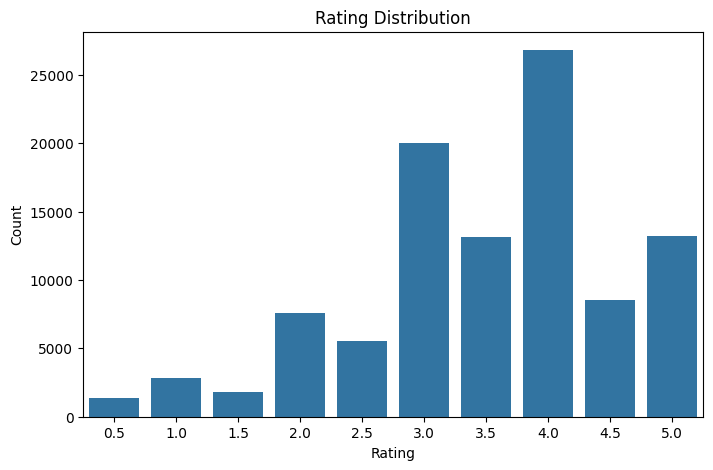

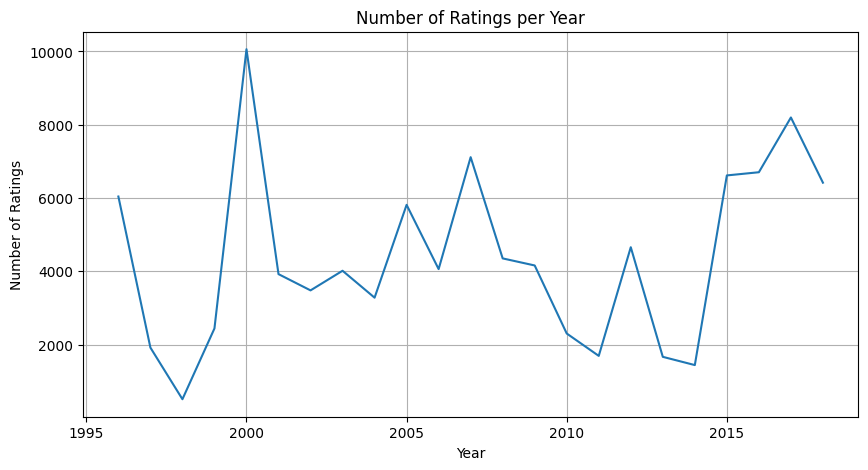

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('ratings.csv').merge(pd.read_csv('movies.csv'), on='movieId')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['timestamp'].dt.year

# Plot 1: Rating Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Plot 2: Ratings Over Time (Year)
plt.figure(figsize=(10, 5))
df.groupby('year')['rating'].count().plot()
plt.title("Number of Ratings per Year")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.grid(True)
plt.show()